In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
import os

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/Fruits_Vegetables.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/fruits_vegetables')

print("Files extracted:")
os.listdir('/content/fruits_vegetables')  # This line is to check the contents of the unzipped directory


Files extracted:


['Fruits_Vegetables']

In [8]:
# Setting the paths
data_test_path    = '/content/fruits_vegetables/Fruits_Vegetables/test'
data_train_path   = '/content/fruits_vegetables/Fruits_Vegetables/train'
data_val_path     = '/content/fruits_vegetables/Fruits_Vegetables/validation'

In [5]:
img_width   =  180
img_height  =  180

In [13]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path ,
    shuffle          = True ,
    image_size       = (img_width,img_height ),
    batch_size       = 32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [43]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path ,
    shuffle          = True ,
    image_size       = (img_width,img_height ),
    batch_size       = 32,
    validation_split = False)

Found 359 files belonging to 36 classes.


In [44]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path ,
    shuffle          = True ,
    image_size       = (img_width,img_height ),
    batch_size       = 32,
    validation_split = False)

Found 351 files belonging to 36 classes.


In [45]:
data_train.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [46]:
data_test.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [47]:
data_val.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [48]:
data_train_cat = data_train.class_names

In [49]:
data_test_cat = data_test.class_names

In [50]:
data_val_cat = data_val.class_names

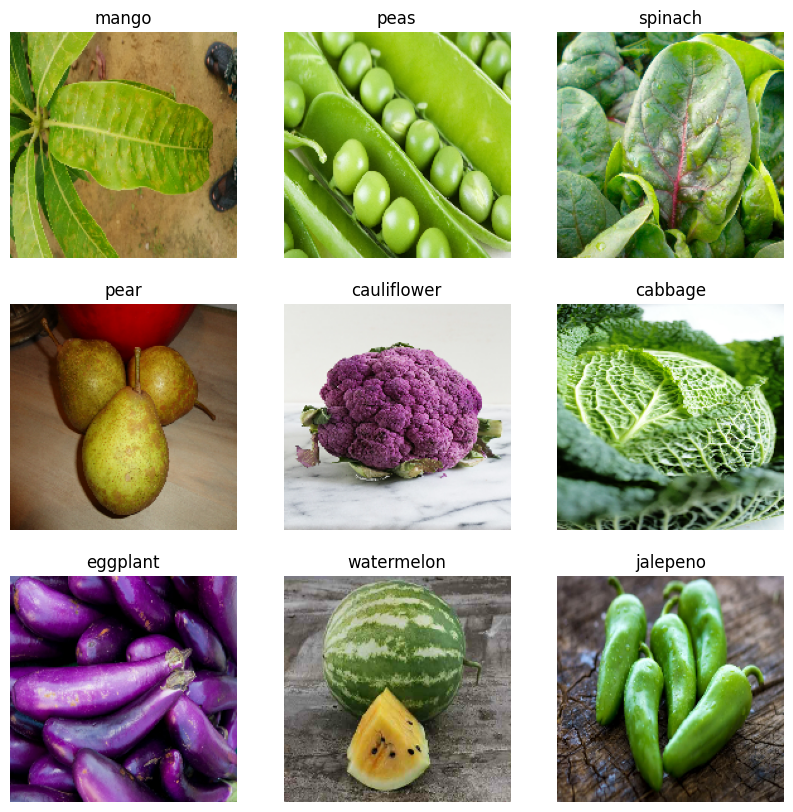

In [51]:
plt.figure(figsize = (10,10))
for image, lables in data_train.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(data_train_cat[lables[i]])
    plt.axis('off')

In [52]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_train_cat))
])

In [53]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [55]:
epochs_size = 25
history = model.fit(
    data_train,
    validation_data = data_val,
    epochs =epochs_size,)

Epoch 1/25
98/98 [==============================] - 173s 2s/step - loss: 3.3393 - accuracy: 0.1005 - val_loss: 2.6581 - val_accuracy: 0.3476
Epoch 2/25
98/98 [==============================] - 174s 2s/step - loss: 2.4623 - accuracy: 0.3011 - val_loss: 1.5964 - val_accuracy: 0.5584
Epoch 3/25
98/98 [==============================] - 178s 2s/step - loss: 1.8263 - accuracy: 0.4780 - val_loss: 1.0743 - val_accuracy: 0.7123
Epoch 4/25
98/98 [==============================] - 174s 2s/step - loss: 1.1917 - accuracy: 0.6597 - val_loss: 0.5518 - val_accuracy: 0.8689
Epoch 5/25
98/98 [==============================] - 171s 2s/step - loss: 0.6095 - accuracy: 0.8218 - val_loss: 0.4062 - val_accuracy: 0.9060
Epoch 6/25
98/98 [==============================] - 178s 2s/step - loss: 0.3614 - accuracy: 0.9047 - val_loss: 0.3592 - val_accuracy: 0.9202
Epoch 7/25
98/98 [==============================] - 174s 2s/step - loss: 0.2402 - accuracy: 0.9432 - val_loss: 0.3413 - val_accuracy: 0.9373
Epoch 8/25
98

Text(0.5, 1.0, 'Accuracy')

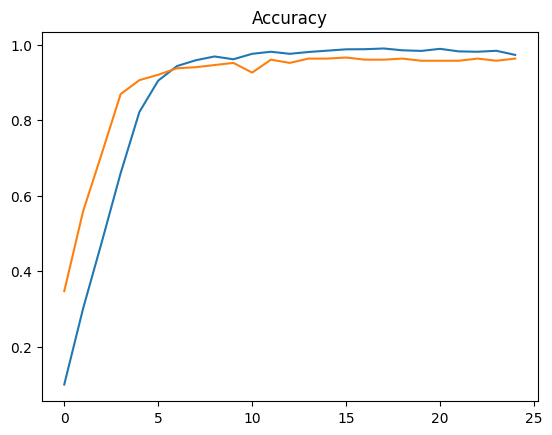

In [62]:

plt.plot(epochs_range, history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')


Text(0.5, 1.0, 'loss')

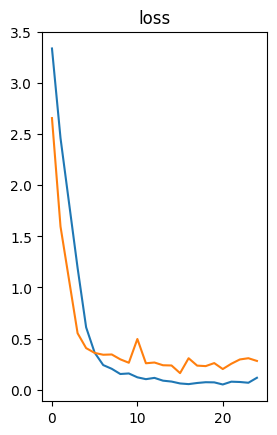

In [60]:
plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'],label = 'Training loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation loss')
plt.title('loss')

In [102]:
sample_image = '/content/Apple.jpg'

In [103]:
image = sample_image
image = tf.keras.utils.load_img(image,target_size=(img_width,img_height))
image_arr = tf.keras.utils.array_to_img(image)
image_bat = tf.expand_dims(image_arr,0)

predict = model.predict(image_bat)

score = tf.nn.softmax(predict)

print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

1/1 [==============================] - 0s 53ms/step
Veg/Fruit in image is apple with accuracy of 99.98


In [104]:
model.save('Image_classify.keras')